# Notebook 1: Initial Data Exploration

**Adolescent Sexual Behavior Survey - Barú, Colombia**

This notebook presents the initial exploration of survey data collected from adolescents (ages 13-17) in rural Barú, Colombia. The analysis focuses on understanding sexual behavior patterns, missing data structures, and preparing for Latent Class Analysis.

---

## Research Context

**Research Question:** What distinct sexual behavior profiles exist among rural adolescents, and how do individual attributes and social network characteristics predict membership in these profiles?

**Study Design:**
- **Sample:** N = 242 adolescents (ages 13-17)
- **Location:** Rural schools in Barú, Colombia
- **Data Collection:** April 2019
- **Survey:** 15 questions on sexual behavior, attitudes, and risk perceptions
- **Ethics:** IRB approved, parental consent + adolescent assent

---

**Author:** Isabella Rodas  
**Institution:** Universidad de los Andes  
**Date:** 2021 (Analysis) | October 2025 (Documentation)


## Table of Contents

1. [Setup & Imports](#setup)
2. [Load Data](#load)
3. [Survey Questions](#questions)
4. [Missing Data Analysis](#missing)
5. [Demographic Overview](#demographics)
6. [Key Variable Distributions](#distributions)
7. [Summary & Next Steps](#summary)


## 1. Setup & Imports <a id='setup'></a>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import sys

# Add parent directory to path for module imports
sys.path.append('..')

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

print("✓ Libraries loaded successfully")


✓ Libraries loaded successfully


## 2. Load Data <a id='load'></a>

**Note:** Raw data files are not included in this public repository due to privacy and ethics requirements. The analysis uses anonymized participant data from the 2019 study. See `Data/README.md` for more information.


In [3]:
# Load survey data
data = pd.read_excel('../Data/0_Raw/2. Participants attributes.xlsx', 
                     sheet_name='IsBaru_Consolidado')

print(f"Dataset loaded successfully!")
print(f"Shape: {data.shape[0]} participants × {data.shape[1]} variables")
print(f"\nFirst few column names:")
print(data.columns[:10].tolist())


Dataset loaded successfully!
Shape: 242 participants × 993 variables

First few column names:
['StartDate', 'EndDate', 'Status', 'Duration__in_seconds_', 'ID', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference']


## 3. Survey Questions <a id='questions'></a>

The survey consists of **15 key questions** covering sexual behavior, attitudes, and risk perceptions among adolescents.

### Question Mapping

Below are the survey questions used in this analysis (Spanish original with English translation):


In [4]:
# Define survey questions
questions = {
    'Q3.11': 'Sex / Sexo',
    'Q3.5': 'Age / Edad',
    'Q11.11': 'Partnership status / Estado de pareja',
    'Q11.39': 'Do you understand what is sexual intercourse? / ¿Entiendes qué es tener relaciones sexuales?',
    'Q11.40': 'Have you had sexual intercourse? / ¿Has tenido relaciones sexuales?',
    'Q11.41': 'How old were you when you had your first sexual intercourse? / ¿Qué edad tenías en tu primera relación sexual?',
    'Q11.44': 'The first time you had sex, was it under the influence of alcohol or drugs? / ¿La primera vez tuviste sexo bajo influencia de alcohol o drogas?',
    'Q11.42': 'The first time you had sex, did you or your partner do anything to prevent pregnancy? / ¿La primera vez, tú o tu pareja hicieron algo para prevenir el embarazo?',
    'Q11.45': 'Have you had sex with your partner? / ¿Has tenido sexo con tu pareja?',
    'Q11.46': 'Do you feel that having sex with your partner allows you to have a closer relationship? / ¿Sientes que tener sexo con tu pareja permite tener una relación más cercana?',
    'Q11.47': 'How concerned are/were you about getting a sexually transmitted disease from your partner? / ¿Qué tan preocupado estás/estuviste por contraer una ETS de tu pareja?',
    'Q11.48': 'How concerned are/were you about getting pregnant with your partner? / ¿Qué tan preocupado estás/estuviste por quedar embarazada con tu pareja?',
    'Q11.49': 'Are you or your partner doing something to avoid pregnancy? / ¿Tú o tu pareja están haciendo algo para evitar el embarazo?',
    'Q11.53': 'Do you think you are going to have sex with someone in the next year? / ¿Crees que vas a tener sexo con alguien en el próximo año?'
}

# Select relevant columns
question_ids = ['ID'] + list(questions.keys())
survey_data = data[question_ids].copy()

# Display questions
print("Survey Questions:\n" + "="*80)
for i, (qid, question) in enumerate(questions.items(), 1):
    print(f"{i:2d}. {qid}: {question}")
    
print(f"\n✓ Selected {len(questions)} questions for analysis")


Survey Questions:
 1. Q3.11: Sex / Sexo
 2. Q3.5: Age / Edad
 3. Q11.11: Partnership status / Estado de pareja
 4. Q11.39: Do you understand what is sexual intercourse? / ¿Entiendes qué es tener relaciones sexuales?
 5. Q11.40: Have you had sexual intercourse? / ¿Has tenido relaciones sexuales?
 6. Q11.41: How old were you when you had your first sexual intercourse? / ¿Qué edad tenías en tu primera relación sexual?
 7. Q11.44: The first time you had sex, was it under the influence of alcohol or drugs? / ¿La primera vez tuviste sexo bajo influencia de alcohol o drogas?
 8. Q11.42: The first time you had sex, did you or your partner do anything to prevent pregnancy? / ¿La primera vez, tú o tu pareja hicieron algo para prevenir el embarazo?
 9. Q11.45: Have you had sex with your partner? / ¿Has tenido sexo con tu pareja?
10. Q11.46: Do you feel that having sex with your partner allows you to have a closer relationship? / ¿Sientes que tener sexo con tu pareja permite tener una relación más

In [5]:
# Rename columns for easier analysis
column_names = ['ID', 'Sex', 'Age', 'Partner_status', 'Understand', 'Had_sex', 
                'Age_sex', 'Sex_under_influence', 'Pregnancy_prevention', 
                'Sex_with_partner', 'Sex_strengthen_relationship', 
                'STD_preocupation', 'Pregnancy_preocupation', 
                'Avoid_pregnancy', 'Sex_within_year']

survey_data.columns = column_names

print(f"Dataset shape: {survey_data.shape}")
survey_data.head(10)


Dataset shape: (242, 15)


,ID,Sex,Age,Partner_status,Understand,Had_sex,Age_sex,Sex_under_influence,Pregnancy_prevention,Sex_with_partner,Sex_strengthen_relationship,STD_preocupation,Pregnancy_preocupation,Avoid_pregnancy,Sex_within_year
0,i1,2.0,2,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i2,1.0,3,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i3,2.0,1,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,i4,1.0,2,4.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,4.0,4.0,1.0,NaN
4,i5,2.0,1,10.0,1.0,1.0,5.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN
5,i6,2.0,1,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,i7,1.0,4,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,i8,1.0,1,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,i9,2.0,1,7.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
9,i10,2.0,1,8.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


## 4. Missing Data Analysis <a id='missing'></a>

Understanding missing data patterns is crucial for this study. Many questions have systematic skip logic (e.g., participants who haven't had sex skip questions about sexual experiences).


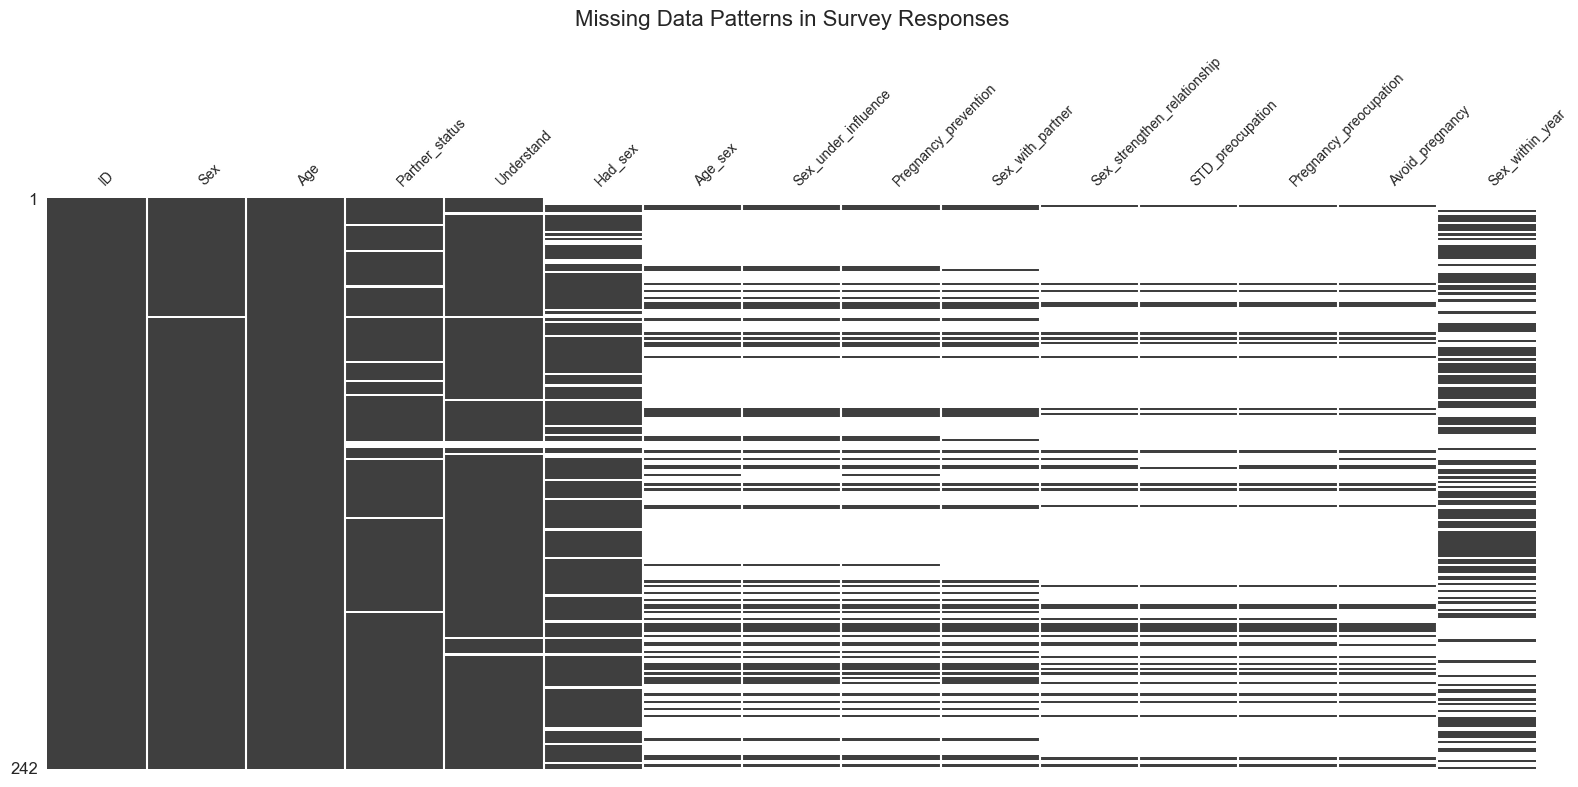


📊 Key Observation: Sexual experience questions show high missingness due to skip logic


In [6]:
# Missing data visualization
fig, ax = plt.subplots(figsize=(16, 8))
msno.matrix(survey_data, figsize=(16, 8), fontsize=10, sparkline=False, ax=ax)
plt.title('Missing Data Patterns in Survey Responses', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Key Observation: Sexual experience questions show high missingness due to skip logic")


In [7]:
# Calculate missing data statistics
missing_stats = pd.DataFrame({
    'Variable': survey_data.columns,
    'Missing_Count': survey_data.isnull().sum(),
    'Missing_Percent': (survey_data.isnull().sum() / len(survey_data) * 100).round(2),
    'Present_Count': survey_data.notnull().sum()
}).sort_values('Missing_Percent', ascending=False)

# Display table
print("Missing Data Summary:")
print("="*80)
print(missing_stats.to_string(index=False))

# Identify high-missingness variables
high_missing = missing_stats[missing_stats['Missing_Percent'] > 70]
print(f"\n⚠️  {len(high_missing)} variables have >70% missing data (likely due to skip logic)")


Missing Data Summary:
                   Variable  Missing_Count  Missing_Percent  Present_Count
           STD_preocupation            205            84.71             37
            Avoid_pregnancy            205            84.71             37
     Pregnancy_preocupation            204            84.30             38
Sex_strengthen_relationship            203            83.88             39
           Sex_with_partner            182            75.21             60
        Sex_under_influence            179            73.97             63
       Pregnancy_prevention            179            73.97             63
                    Age_sex            178            73.55             64
            Sex_within_year            119            49.17            123
                    Had_sex             39            16.12            203
             Partner_status             13             5.37            229
                 Understand              9             3.72            233
   

## 5. Demographic Overview <a id='demographics'></a>


In [8]:
# Basic demographics
print("Sample Demographics:")
print("="*80)
print(f"Total participants: {len(survey_data)}")
print(f"\nAge distribution:")
print(survey_data['Age'].value_counts().sort_index())
print(f"\nSex distribution:")
print(survey_data['Sex'].value_counts())


Sample Demographics:
Total participants: 242

Age distribution:
Age
1    45
2    65
3    58
4    46
5    28
Name: count, dtype: int64

Sex distribution:
Sex
2.0    120
1.0    118
3.0      3
Name: count, dtype: int64


In [ ]:
# Stacked bar plots: Gender distribution by Age/Grade
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Map age codes to actual ages (approximate)
age_labels = {1: '13 yrs', 2: '14 yrs', 3: '15 yrs', 4: '16 yrs', 5: '17 yrs'}

# Prepare data: Count of each gender by age
gender_by_age = survey_data.groupby(['Age', 'Sex']).size().unstack(fill_value=0)

# Plot 1: Stacked bar - Gender by Age
gender_by_age.plot(kind='bar', stacked=True, ax=axes[0], 
                   color=['#4ECDC4', '#FF6B6B', '#95E1D3'],
                   edgecolor='black', linewidth=0.5, alpha=0.85)
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Students', fontsize=12, fontweight='bold')
axes[0].set_title('Gender Distribution by Age', fontsize=14, fontweight='bold')
axes[0].set_xticklabels([age_labels.get(int(x.get_text()), x.get_text()) 
                         for x in axes[0].get_xticklabels()], rotation=0)
axes[0].legend(['Male', 'Female', 'Other'], title='Gender', loc='upper right')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center', fontsize=9, fontweight='bold')

# Plot 2: 100% Stacked bar - Gender proportions by Age
gender_by_age_pct = gender_by_age.div(gender_by_age.sum(axis=1), axis=0) * 100
gender_by_age_pct.plot(kind='bar', stacked=True, ax=axes[1],
                       color=['#4ECDC4', '#FF6B6B', '#95E1D3'],
                       edgecolor='black', linewidth=0.5, alpha=0.85)
axes[1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Gender Proportion by Age (100% Stacked)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels([age_labels.get(int(x.get_text()), x.get_text()) 
                         for x in axes[1].get_xticklabels()], rotation=0)
axes[1].legend(['Male', 'Female', 'Other'], title='Gender', loc='upper right')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Gender Distribution by Age:")
print("="*80)
print(gender_by_age)
print(f"\n💡 Age codes: 1=13yrs, 2=14yrs, 3=15yrs, 4=16yrs, 5=17yrs")
print(f"   Sample is relatively balanced across ages 13-16, fewer 17-year-olds")


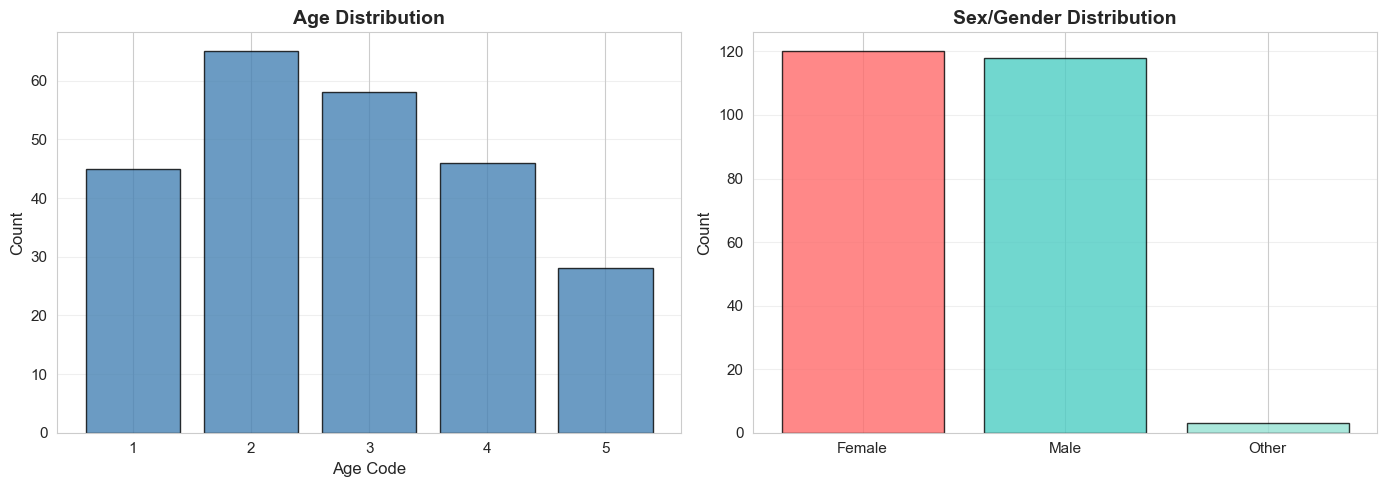


✓ Sample: 242 adolescents (ages 13-17) from rural Barú, Colombia


In [9]:
# Visualize demographics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
age_counts = survey_data['Age'].value_counts().sort_index()
axes[0].bar(age_counts.index, age_counts.values, color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Age Code', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Sex distribution  
sex_counts = survey_data['Sex'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']
axes[1].bar(range(len(sex_counts)), sex_counts.values, color=colors[:len(sex_counts)], 
            edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(sex_counts)))
axes[1].set_xticklabels(['Male' if x==1 else 'Female' if x==2 else 'Other' 
                         for x in sex_counts.index])
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Sex/Gender Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Sample: {len(survey_data)} adolescents (ages 13-17) from rural Barú, Colombia")


## 6. Key Variable Distributions <a id='distributions'></a>

Let's examine the distribution of key behavioral variables.


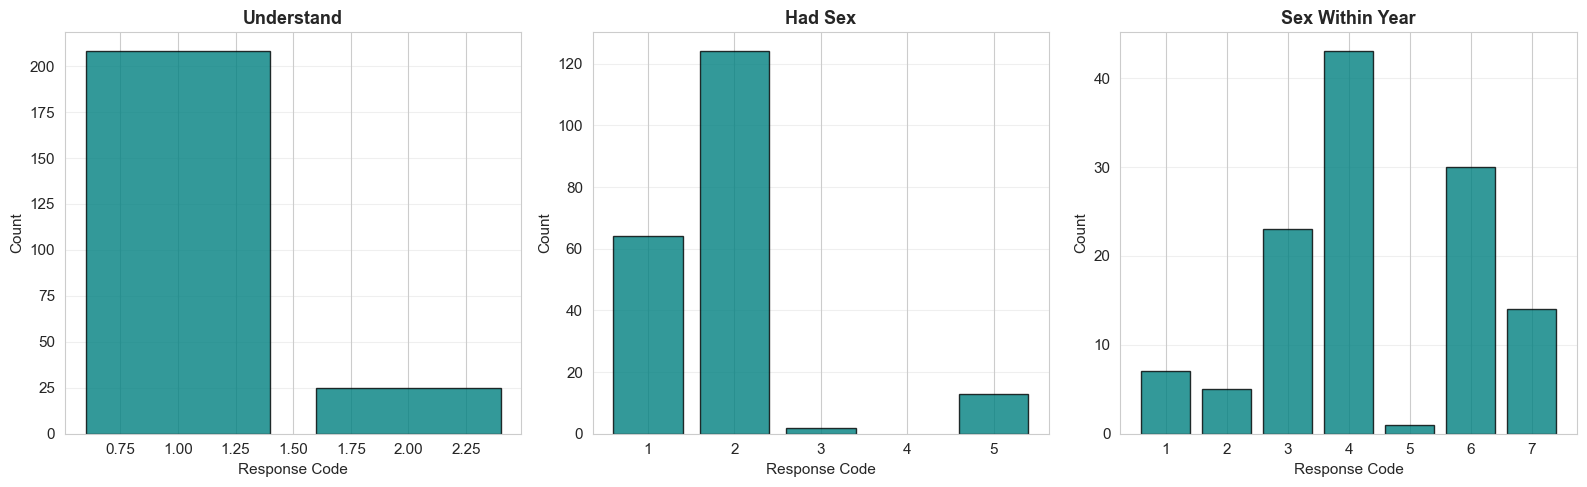

Response distributions for key questions (codes need to be interpreted with codebook)


In [10]:
# Key behavioral questions
key_vars = ['Understand', 'Had_sex', 'Sex_within_year']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, var in enumerate(key_vars):
    counts = survey_data[var].value_counts().sort_index()
    axes[i].bar(counts.index, counts.values, color='teal', edgecolor='black', alpha=0.8)
    axes[i].set_xlabel('Response Code', fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].set_title(var.replace('_', ' ').title(), fontsize=13, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)
    
plt.tight_layout()
plt.show()

print("Response distributions for key questions (codes need to be interpreted with codebook)")


## 7. Correlation Analysis <a id='correlations'></a>

**Motivation for Factor Analysis:** Sexual behavior variables are often highly correlated. This high correlation suggests underlying latent factors that can be extracted through Factor Analysis.


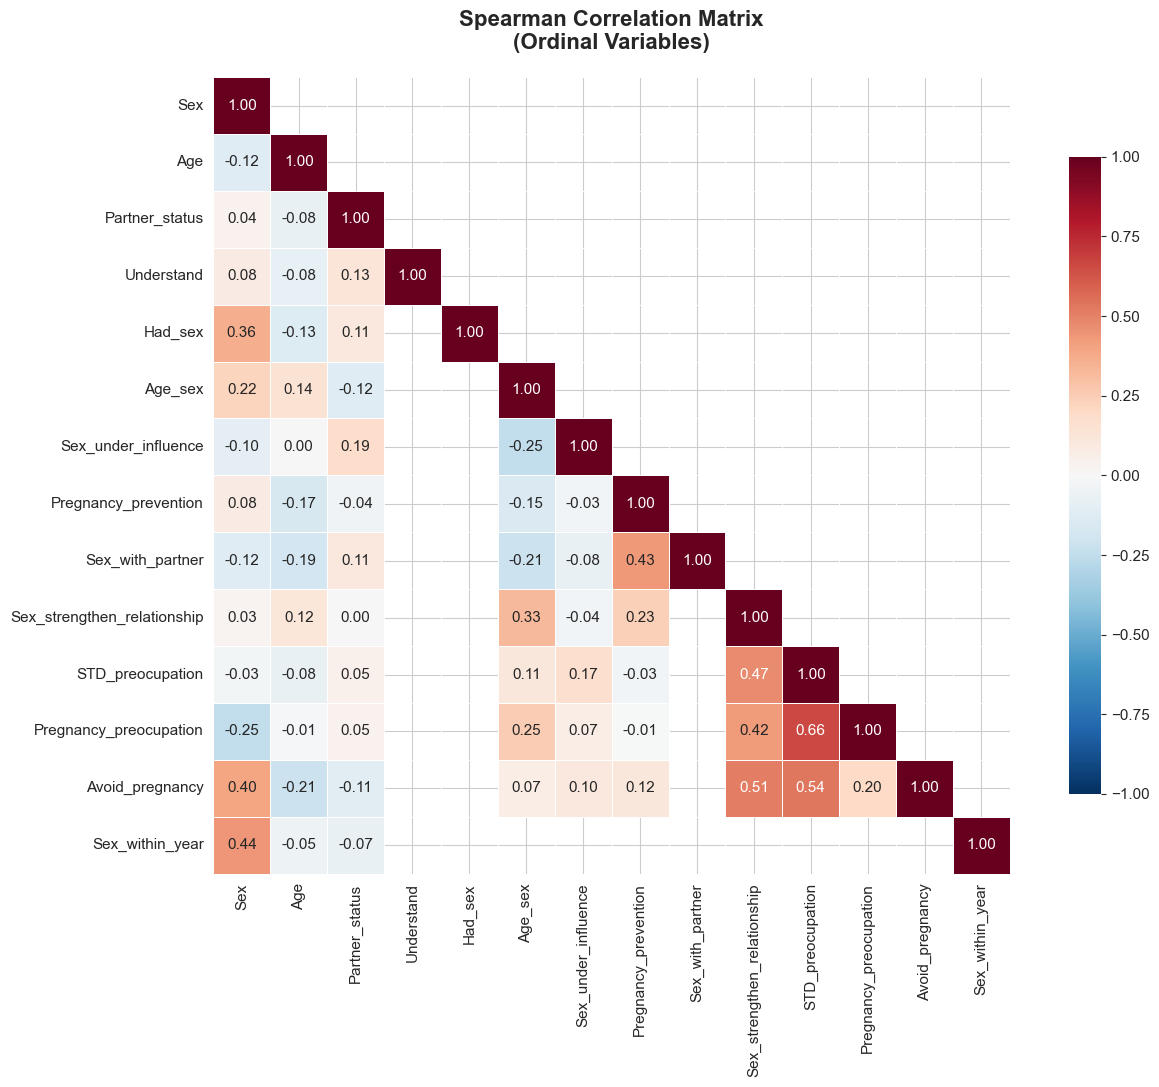


📊 Found 3 variable pairs with |correlation| > 0.5

💡 High correlations indicate potential underlying factors
   → This motivates the use of Factor Analysis to reduce dimensionality


In [11]:
# Calculate Spearman correlation (appropriate for ordinal data)
numeric_cols = survey_data.select_dtypes(include=[np.number]).drop(columns=['ID'], errors='ignore')
corr_matrix = numeric_cols.corr(method='spearman')

# Visualize correlation matrix
plt.figure(figsize=(14, 11))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Spearman Correlation Matrix\n(Ordinal Variables)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Count high correlations
high_corr = (corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1.0)
n_high_corr = high_corr.sum().sum() // 2  # Divide by 2 for symmetry
print(f"\n📊 Found {n_high_corr} variable pairs with |correlation| > 0.5")
print("\n💡 High correlations indicate potential underlying factors")
print("   → This motivates the use of Factor Analysis to reduce dimensionality")


## 8. Summary & Next Steps <a id='summary'></a>

### Key Findings from Initial Exploration:

1. **Sample:** 242 adolescents (ages 13-17) from rural Barú, Colombia
2. **Missing Data:** Significant missingness in sexual experience questions due to systematic skip logic
3. **High Correlations:** Many variables are highly correlated (|r| > 0.5)
4. **Implication:** Factor Analysis is appropriate to:
   - Handle highly correlated variables
   - Extract underlying behavioral dimensions
   - Reduce dimensionality for clustering

---

### Next Steps:

**Notebook 2:** Data Cleaning & Preprocessing
- Handle missing data appropriately (skip logic, imputation)
- Recode variables for analysis
- Prepare data for Factor Analysis

**Notebook 3:** Factor Analysis & Clustering  
- Test suitability (Bartlett's, KMO)
- Extract factors
- Apply 8 clustering methods
- Select optimal clustering (5 clusters)

---

**Analysis conducted:** 2021  
**Repository organized:** October 2025
